In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score
from seaborn import heatmap
from sklearn.preprocessing import MinMaxScaler, StandardScaler

<h2> Exercise Set 1

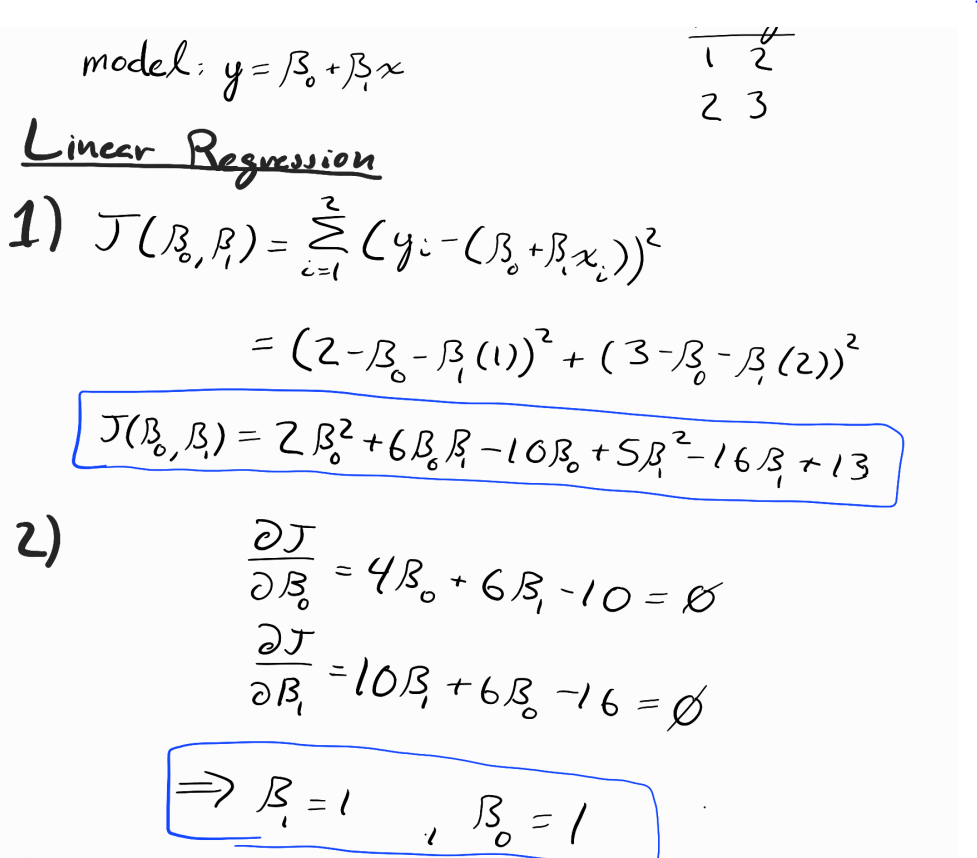


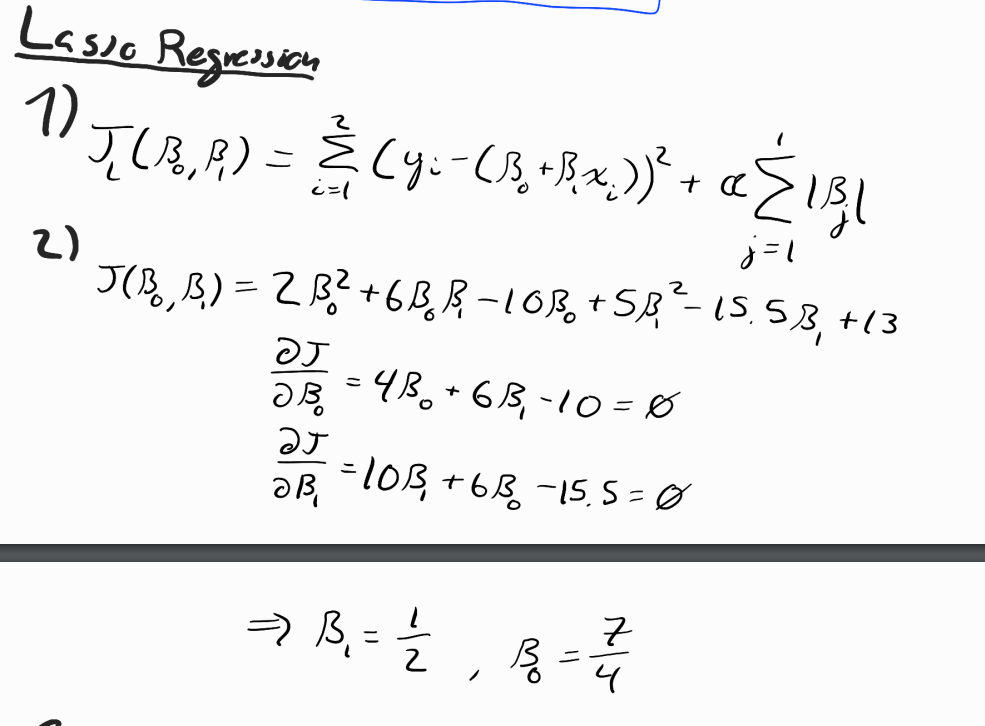


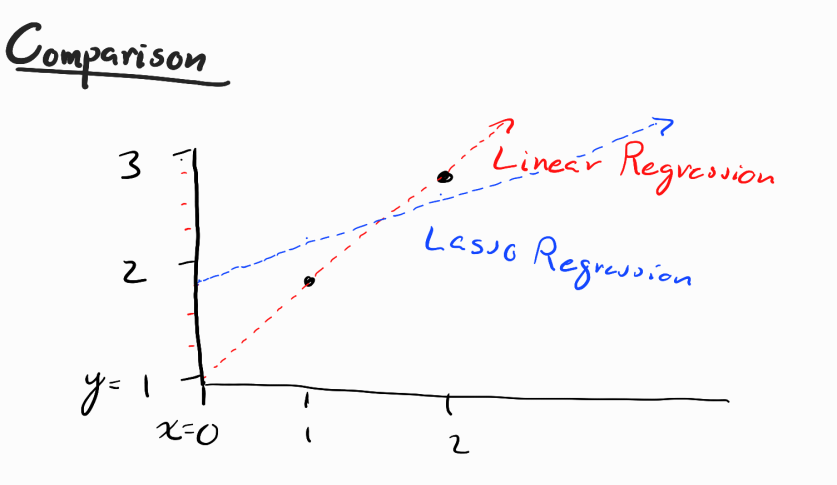


<h2> Exercise Set 2 <h5>

In [160]:
# Exercise Set 2 (a)
url='https://raw.githubusercontent.com/aims-umich/ners590data/main/xs.csv'
data = pd.read_csv(url)
data = data.dropna()
print("First five rows:")
data.head(5)

First five rows:


,FissionFast,CaptureFast,FissionThermal,CaptureThermal,Scatter12,Scatter11,Scatter21,Scatter22,k
0,0.006446,0.009248,0.130007,0.080836,0.014973,0.482483,0.001506,1.12546,1.256376
1,0.006359,0.009347,0.128811,0.081048,0.015363,0.490558,0.001497,1.12616,1.241534
2,0.006467,0.009253,0.129465,0.080762,0.015198,0.486784,0.001493,1.12423,1.256988
3,0.006479,0.009258,0.130903,0.081478,0.015345,0.492895,0.001516,1.13075,1.261442
4,0.006431,0.009248,0.129757,0.081129,0.015216,0.488249,0.001506,1.12731,1.253744


In [161]:
print("The data has shape", data.shape)
data.describe()

The data has shape (1000, 9)


,FissionFast,CaptureFast,FissionThermal,CaptureThermal,Scatter12,Scatter11,Scatter21,Scatter22,k
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,0.006410,0.009386,0.129988,0.081024,0.015420,0.492645,0.001505,1.127251,1.251687
std,0.000060,0.000088,0.000665,0.000201,0.000208,0.004637,0.000009,0.002865,0.007333
min,0.006223,0.009095,0.127935,0.080462,0.014726,0.477007,0.001478,1.118430,1.229164
25%,0.006369,0.009326,0.129534,0.080882,0.015289,0.489706,0.001499,1.125375,1.246398
50%,0.006408,0.009385,0.129978,0.081021,0.015426,0.492776,0.001505,1.127310,1.251829
75%,0.006453,0.009443,0.130453,0.081176,0.015564,0.495704,0.001511,1.129082,1.256902
max,0.006591,0.009619,0.131933,0.081567,0.016105,0.507475,0.001531,1.135430,1.274956


<Axes: >

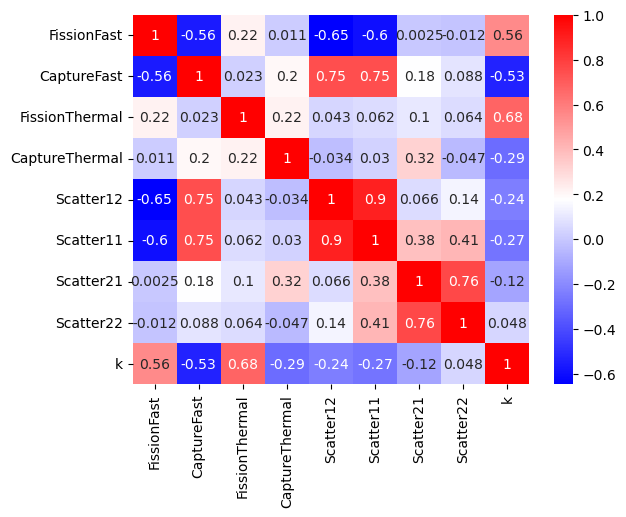

In [162]:
# Exercise Set 2 (b)
corr = data.corr(method='spearman')
heatmap(corr, annot = True, cmap = 'bwr')

<h5>k is most strongly positively correlated with FissionThermal and most strongly negatively correlated with CaptureFast

In [163]:
# Exercise Set 2 (c)
X = data.values[:,0:8]
Y = data.values[:,-1]

In [164]:
# Exercise Set 2 (d)
Xtrain = X[0:800,:]
Xtest = X[800:1000,:]
Ytrain = Y[0:800]
Ytest = Y[800:1000]

In [169]:
# Exercise Set 2 (e)
xscaler =MinMaxScaler()
Xtrain_scaled=xscaler.fit_transform(Xtrain)
Xtest_scaled=xscaler.transform(Xtest)

In [172]:
# Exercise Set 2 (f)
lr = LinearRegression()
lr.fit(Xtrain_scaled, Ytrain)
ylr = lr.predict(Xtest_scaled)

In [173]:
# Exercise Set 2 (g)
rid = Ridge(alpha = 0.5)
rid.fit(Xtrain_scaled, Ytrain)
yrid = rid.predict(Xtest_scaled)

las = Lasso(alpha = 0.5)
las.fit(Xtrain_scaled, Ytrain)
ylas = las.predict(Xtest_scaled)

ent = ElasticNet(alpha = 0.5, l1_ratio = 0.5)
ent.fit(Xtrain_scaled, Ytrain)
yent = ent.predict(Xtest_scaled)

In [174]:
def metrics(y, yhat):
    ybar = np.mean(y)
    dif = np.abs(y-yhat)
    mae = np.mean(dif)
    perc_dif = ((y-yhat) / y)
    mape = np.mean(np.abs(perc_dif))*100
    r2 = 1-np.sum(dif**2)/np.sum((y-ybar)**2)
    return mae, mape, r2

metdf = pd.DataFrame(np.column_stack((metrics(Ytest, ylr), metrics(Ytest, yrid), metrics(Ytest, ylas), \
                      metrics(Ytest, yent))), columns = ['Lin_Regression', 'Ridge', 'Lasso', 'e_net'])

print(metdf)

   Lin_Regression     Ridge     Lasso     e_net
0        0.000048  0.000252  0.006170  0.006170
1        0.003803  0.020142  0.493113  0.493113
2        0.999923  0.998376 -0.000666 -0.000666


<h2> Exercise Set 3

<Axes: >

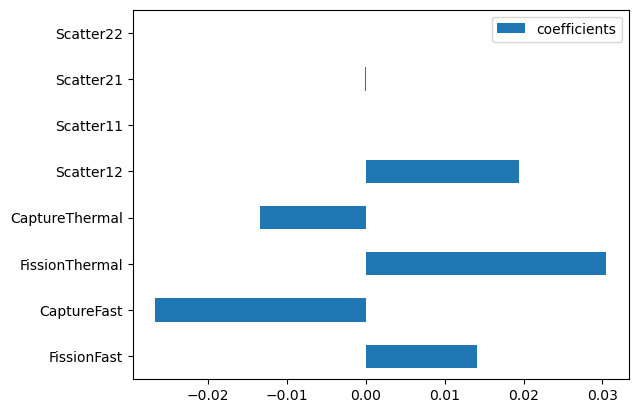

In [204]:
# Exercise Set 3 (a)
coefnp = lr.coef_
coefdf = pd.DataFrame(coefnp, columns=['coefficients'], index=data.columns[0:8])
coefdf.plot.barh()

<Axes: >

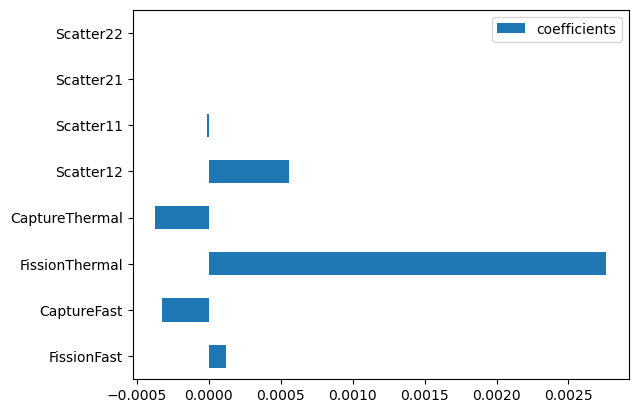

In [205]:
# Exercise Set 3 (b)
xtraindf = pd.DataFrame(Xtrain, columns=data.columns[0:8])
xstd = xtraindf.std(axis=0)
ystd = Ytrain.std()
coefnp_scaled = coefnp * xstd / ystd
coefdf_scaled = pd.DataFrame(coefnp_scaled, columns=['coefficients'], index=data.columns[0:8])
coefdf_scaled.plot.barh()


In [206]:
# Exercise Set 3 (c)
coefdf_scaled_abs = coefdf_scaled.abs()
print("Most important coefficients affecting k in order are:")
print(coefdf_scaled_abs.sort_values('coefficients', ascending=False).head(5).index.values)

Most important coefficients affecting k in order are:
['FissionThermal' 'Scatter12' 'CaptureThermal' 'CaptureFast' 'FissionFast']
